In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))



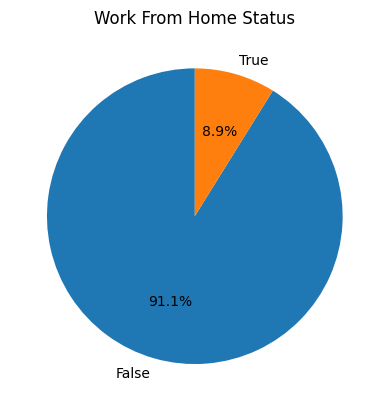

In [8]:
df['job_work_from_home'].value_counts().plot(kind = 'pie', startangle= 90, autopct='%1.1f%%')
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()

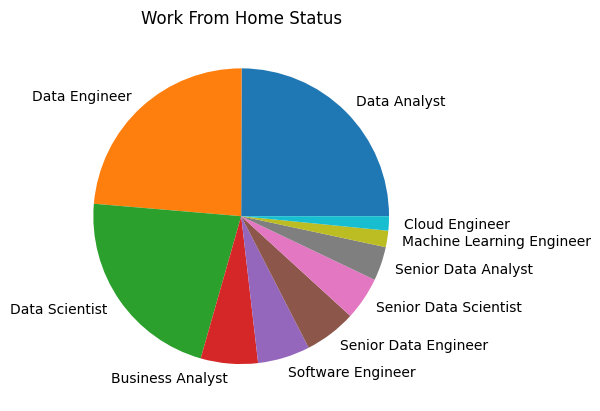

In [6]:
df['job_title_short'].value_counts().plot(kind = 'pie')
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()

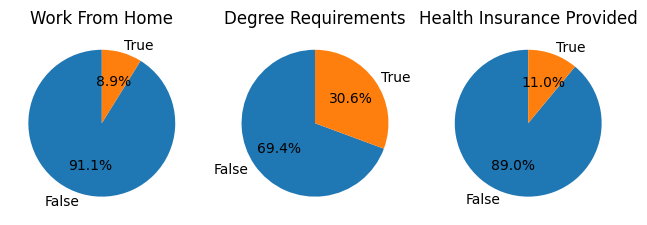

In [19]:
fig, ax = plt.subplots(1,3)

dict_column ={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Degree Requirements',
    'job_health_insurance': 'Health Insurance Provided'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle= 90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
fig.tight_layout()


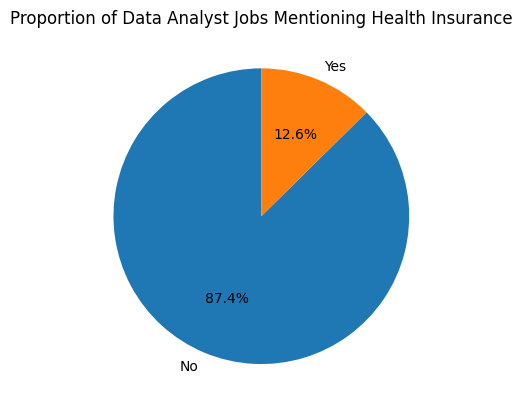

In [38]:
Df_DA = df[df['job_title_short'] == 'Data Analyst']
DA_health = df_DA['job_health_insurance'].value_counts()
plt.pie(
    DA_health,
    startangle= 90,
    autopct= '%1.1f%%',
    labels= ['No', 'Yes'],
    )
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

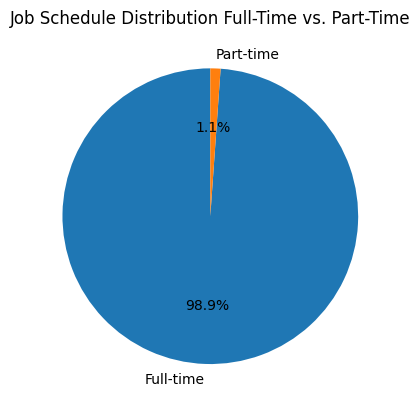

In [84]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()
count = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(
    count,
    labels= count.index,
    startangle= 90,
    autopct= '%1.1f%%')
plt.title('Job Schedule Distribution Full-Time vs. Part-Time')
plt.show

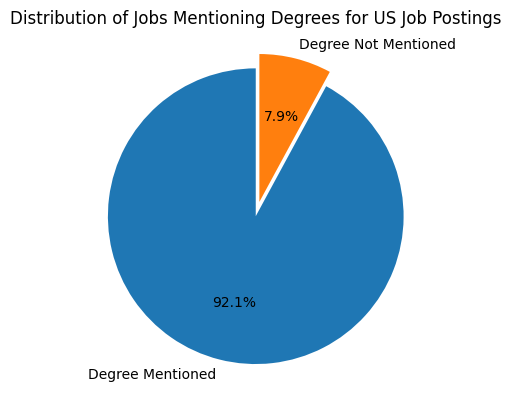

In [91]:
df_US = df[df['job_location'] == 'United States']
df_US_degree = df_US['job_no_degree_mention'].value_counts()
plt.pie(
    df_US_degree,
    explode=(0,0.1),
    labels=['Degree Mentioned','Degree Not Mentioned'],
    startangle= 90,
    autopct= '%1.1f%%'
)
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()